In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from Decision_tree import build_node, decision_tree_predict

In [233]:
import pickle

In [220]:
data = pd.read_csv('images/images.csv')

In [221]:
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [222]:
# модель неоптимизирована, поэтому будем её обучать на очень маленьком наборе данных
X_train, X_test = np.split(data, [int(0.02 * len(data))])
Y_test = np.array(X_test['label'])

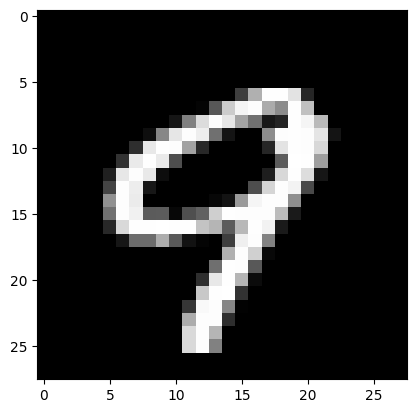

In [223]:
data_numpy = data.values

image_matrix = data_numpy[100, 1:].reshape(28, 28)

plt.imshow(image_matrix, cmap='gray', vmin=0, vmax=255)

<AxesSubplot:>

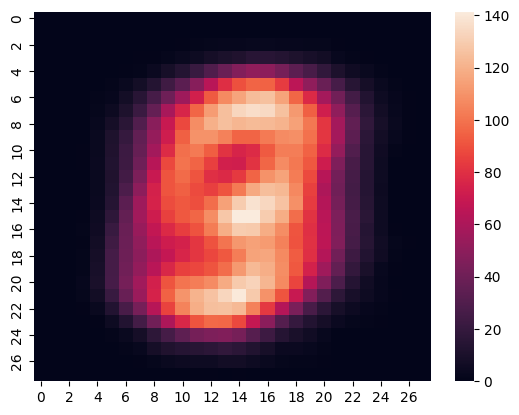

In [224]:
sns.heatmap(pd.DataFrame(X_train.drop('label', axis=1).mean().values.reshape(28, 28)))

Заметим, что первые несколько строк можно отбросить, т.к. они ни на что не влияют

In [225]:
useless_pixels = 3 * 28

In [226]:
X_train = np.array(X_train)
X_train[:, [0, -1]] = X_train[:, [-1, 0]]
X_train = X_train[:, useless_pixels:]
X_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 6],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 9]], dtype=int64)

In [227]:
X_test = np.array(X_test)
X_test = X_test[:, 1 + useless_pixels:]
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [228]:
model = build_node(X_train, max_depth=5)

In [234]:
with open('trained_model.ipynb', 'wb') as file:
    pickle.dump(model, file)